<a href="https://colab.research.google.com/github/derekbomfimprates/FraudDetection/blob/main/First_Project_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection

In this project I will use decission tree and logistic regression to detect  fraudulent transactions based on historical data. Demonstrate the end-to-end process of data cleaning, model development, evaluation, and deployment.

**Key Objective:** Build a machine learning model that can classify transactions as "fraudulent" or "non-fraudulent."


# Import Section

In this section, I will import the necessary libraries, including Pandas for data manipulation, NumPy for numerical operations, and other libraries for building and evaluating machine learning models

In [45]:
# Import Section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings


# Data Loading Section

In this section, I will import the dataset (in .csv format) and use Pandas to manipulate it.

In [46]:
# Mounting to google driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Read a the dataset (.CSV) file and load its contents into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/datasets/creditcard.csv')

# Print the header and 5 rows of dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploration Section

In this section, I will explore the data in the dataframe and perform some cleaning processes.

In [48]:
#DataFrame information:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
print(f"\nTotal number of missing (NA) values in the dataset: {df.isna().sum().sum()}")



Total number of missing (NA) values in the dataset: 0


In [50]:
print(f"\nTotal number of duplicated values in the dataset: {df.duplicated().sum()}")


Total number of duplicated values in the dataset: 1081


In [51]:
print(f"Shape of dataset before removing duplicated values: {df.shape}")


Shape of dataset before removing duplicated values: (284807, 31)


In [52]:
# Calculate percentage of duplicated values
perc_duplicated = df.duplicated().sum() / df.shape[0] * 100
print(f"Percentage of duplicated values in the dataset: {perc_duplicated:.2f}%")

# Drop duplicates
df_cleaned = df.drop_duplicates()
print(f"\nTotal number of duplicated values in the dataset: {df_cleaned.duplicated().sum()}")

# Print shapes before and after removing duplicates
print(f"Shape of dataset before removing duplicated values: {df.shape}")
print(f"Shape of dataset after removing duplicated values: {df_cleaned.shape}")


Percentage of duplicated values in the dataset: 0.38%

Total number of duplicated values in the dataset: 0
Shape of dataset before removing duplicated values: (284807, 31)
Shape of dataset after removing duplicated values: (283726, 31)


In [53]:
# Data Exploration
# Summary statistics for the cleaned dataFrame (df_cleaned)

summary_stats = df_cleaned.describe()
print("Summary statistics of numerical features in the cleaned dataset:")
print(summary_stats)


Summary statistics of numerical features in the cleaned dataset:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307  

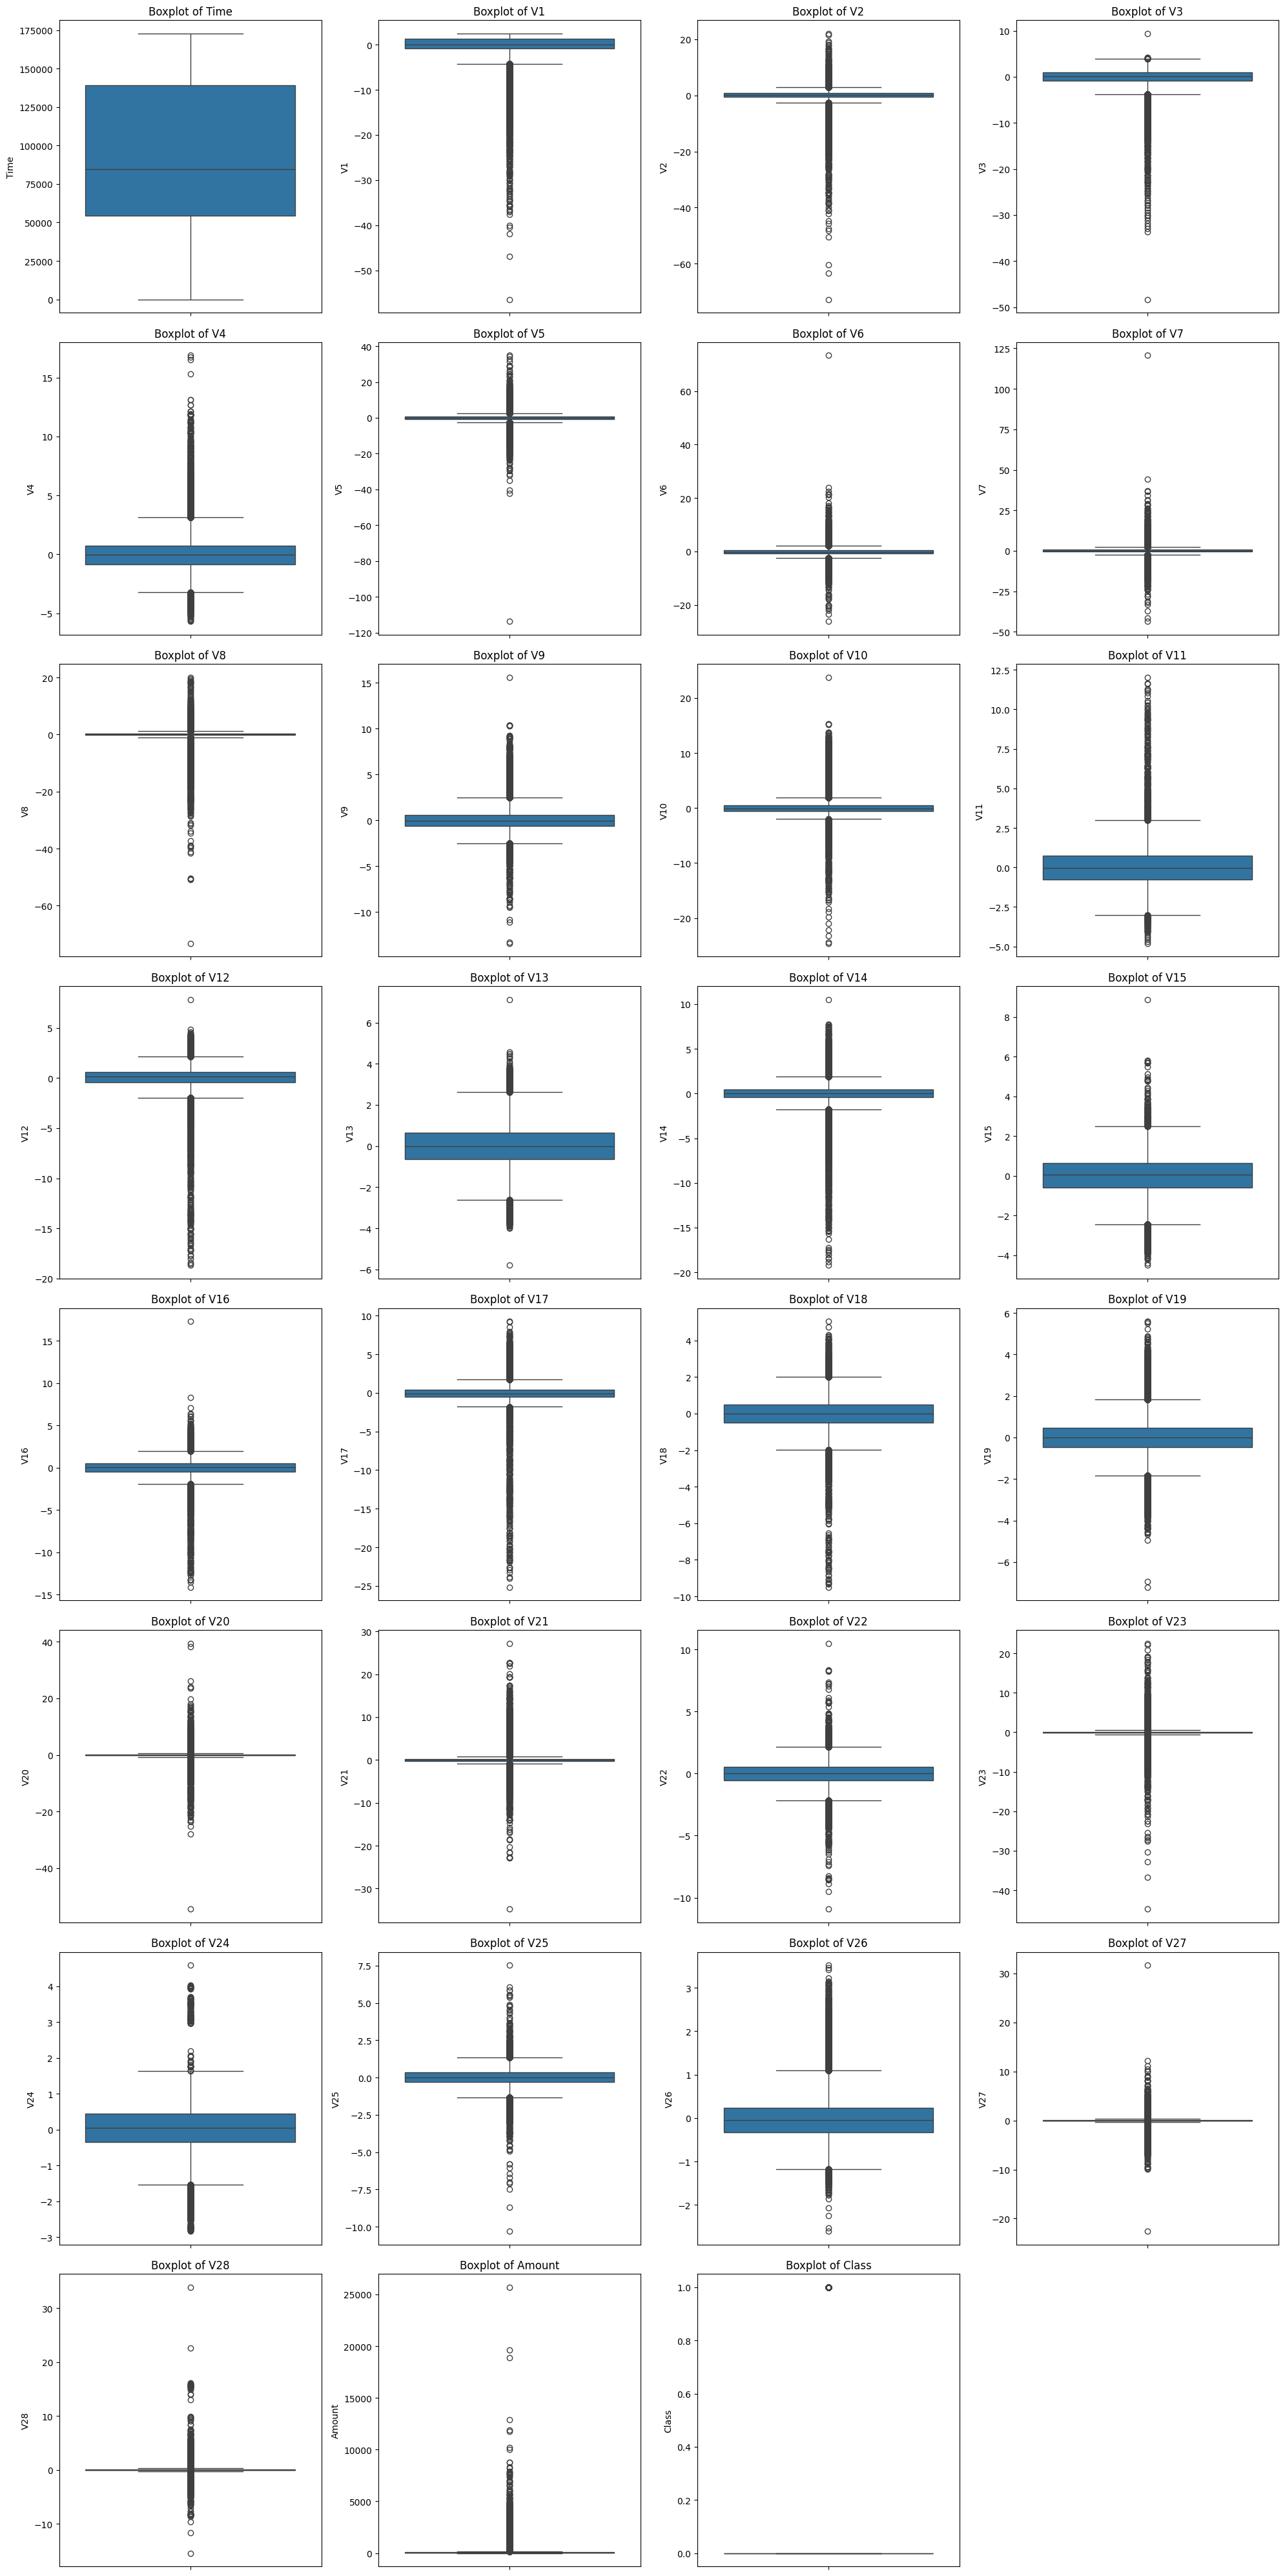

In [54]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Boxplots for each feature in the cleaned dataset

# Number of columns per row
cols = 4

# Create subplots
num_plots = len(df_cleaned.columns) # Number of columns
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))  # figure size
axes = axes.flatten()  # Flatten the 2D array of axes to make iteration easier

# Loop through each feature and create a boxplot
for i, col in enumerate(df_cleaned.columns):
    sns.boxplot(data=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

**Class Labels**

- **Class 0:** Majority class, which in this context is the "not fraudulent" instances.

- **Class 1:** Minority class, which is the "fraudulent" instances

In [55]:
# Check if the feature 'class' is balance or not
df_cleaned['Class'].value_counts()

# Fraulent - Class = 1
# Non-fraulent - Class = 0

,count
Class,
0,283253
1,473


In [56]:
# Separate the features and target variable from the dataset

X = df.drop(columns=['Class'])  # Drop the 'Class' column
y = df['Class']                 # Use the 'Class' column as the target variable(fraudulent or not)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,             # Features for training
    y,             # Target for training
    test_size=0.2, # 20% of the data will be used for testing
    random_state=42, # setting a random seed
    stratify=y     # Ensure the same proportion of classes in both training and test sets
)

# Apply SMOTE to oversample the minority class in the training set
sm = SMOTE(random_state=42)       # Initialize SMOTE with a random seed
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) # Fit SMOTE to the training data and resample

# Check the new class distribution in the resampled training set
print(pd.Series(y_train_res).value_counts())  # Print the counts of each class in the resampled training set


Class
0    227451
1    227451
Name: count, dtype: int64


In [57]:
scaler = StandardScaler()

# Scale only the features (not the target)
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the balanced training data
logreg.fit(X_train_res_scaled, y_train_res)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate the Logistic Regression model

# Evaluate the Logistic Regression model
print("Logistic Regression Results:")
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)
# Extract True Negatives (TN), False Positives (FP), False Negatives (FN), True Positives (TP)
TN, FP, FN, TP = cm.ravel()

# Calculate total instances
total_instances = TN + FP + FN + TP
print(f"Total instances: {total_instances}")

# Optional: Print individual counts
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


- **True Negatives (TN):** **56296** - Number of instances that were correctly predicted as not fraudulent.

- **False Positives (FP):** **568** - Number of instances that were incorrectly predicted as fraudulent when they were actually not fraudulent.

- **False Negatives (FN)**: **10** - Number of instances that were incorrectly predicted as not fraudulent when they were actually fraudulent.

- **True Positives (TP):** **88** - Number of instances that were correctly predicted as fraudulent.

In [63]:
print(classification_report(y_test, y_pred_logreg))
# ROC-AUC score
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1])
print(f"Logistic Regression ROC-AUC: {logreg_roc_auc}")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Logistic Regression ROC-AUC: 0.9764816590676788


**Precision:** Measures the accuracy of the positive predictions.

Precision = TP/ (TP + FP)

- Class 0: Precision is 1.00, meaning all predicted "not fraudulent" instances were correct.

- Class 1: Precision is 0.13, indicating that only 13% of the instances predicted as "fraudulent" were actually fraudulent.

**Recall (Sensitivity):** Measures the ability of the model to find all the relevant cases (actual positives).

Recall = TP/ (TP + FN)

- Class 0: Recall is 0.99, meaning 99% of the actual "not fraudulent" instances were correctly identified.

- Class 1: Recall is 0.90, meaning 90% of the actual "fraudulent" instances were correctly identified.

**F1-Score:** The harmonic mean of precision and recall, which balances the two metrics.

F1-Score = 2 x ((P x R)/(P + R))

- Class 0: The F1-score is 0.99, reflecting both high precision and high recall.

- Class 1: The F1-score is 0.23, which is low due to the low precision despite good recall. This indicates the model struggles to identify "fraudulent" instances correctly.

**Support:** The number of actual occurrences of the class in the specified dataset.


- Class 0:  There are 56864 instances.

- Class 1: There are 98 instances.

The model performs exceptionally well at predicting the "not fraudulent" class (class 0) but struggles with the "fraudulent" class (class 1), as indicated by the low precision and F1-score for that class. The high overall accuracy and the weighted average scores might be misleading in this case due to the class imbalance. It suggests that while the model is generally accurate, it does not perform equally well across both classes.

In [64]:
# Initialize Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the balanced training data
tree.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_tree = tree.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# ROC-AUC score
tree_roc_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])
print(f"Decision Tree ROC-AUC: {tree_roc_auc}")


Decision Tree Results:
[[56758   106]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree ROC-AUC: 0.897027135277296


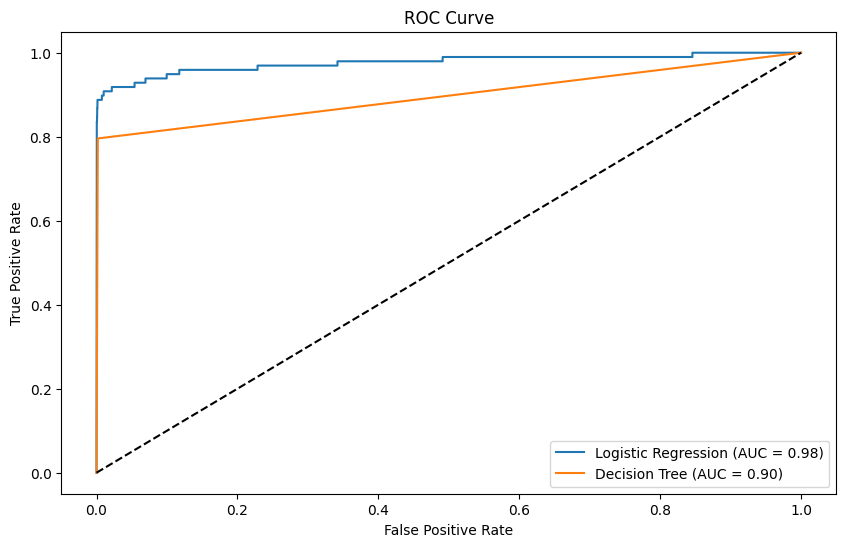

In [65]:
# Plot ROC curve for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {logreg_roc_auc:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {tree_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [66]:
# Separate majority and minority classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# Perform undersampling
df_majority_undersampled = df_majority.sample(len(df_minority), random_state=42)

# Combine undersampled majority class with minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Check the new class distribution
print(df_undersampled['Class'].value_counts())

# Features and target
X = df_undersampled.drop(columns=['Class'])
y = df_undersampled['Class']


Class
0    492
1    492
Name: count, dtype: int64


In [68]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the undersampled training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate Logistic Regression model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# ROC-AUC score
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1])
print(f"Logistic Regression ROC-AUC: {logreg_roc_auc}")


Logistic Regression Results:
[[97  2]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Logistic Regression ROC-AUC: 0.9839208410636981


In [21]:
# Initialize Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the undersampled training data
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree.predict(X_test)

# Evaluate Decision Tree model
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# ROC-AUC score
tree_roc_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])
print(f"Decision Tree ROC-AUC: {tree_roc_auc}")


Decision Tree Results:
[[135  13]
 [ 14 134]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       148
           1       0.91      0.91      0.91       148

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296

Decision Tree ROC-AUC: 0.9087837837837837


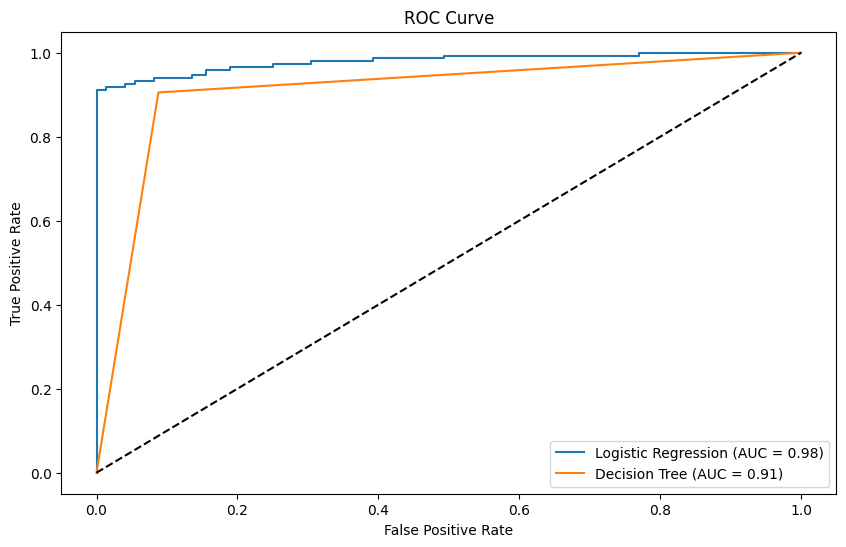

In [22]:
# Plot ROC curve for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {logreg_roc_auc:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {tree_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Conclusion:

Based on these metrics, **undersampling** is giving better results overall in terms of fraud detection (recall, precision, and fewer false positives).

The choice between **undersampling** and **oversampling** depends on the use case—if false positives are costly, undersampling might be the better approach; if the goal is to minimize false negatives (missing fraud), oversampling could still be valuable.